In [1]:
pip install pillow 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pillow in c:\users\rani_\anaconda6\lib\site-packages (9.4.0)



In [2]:
from IPython.display import Image

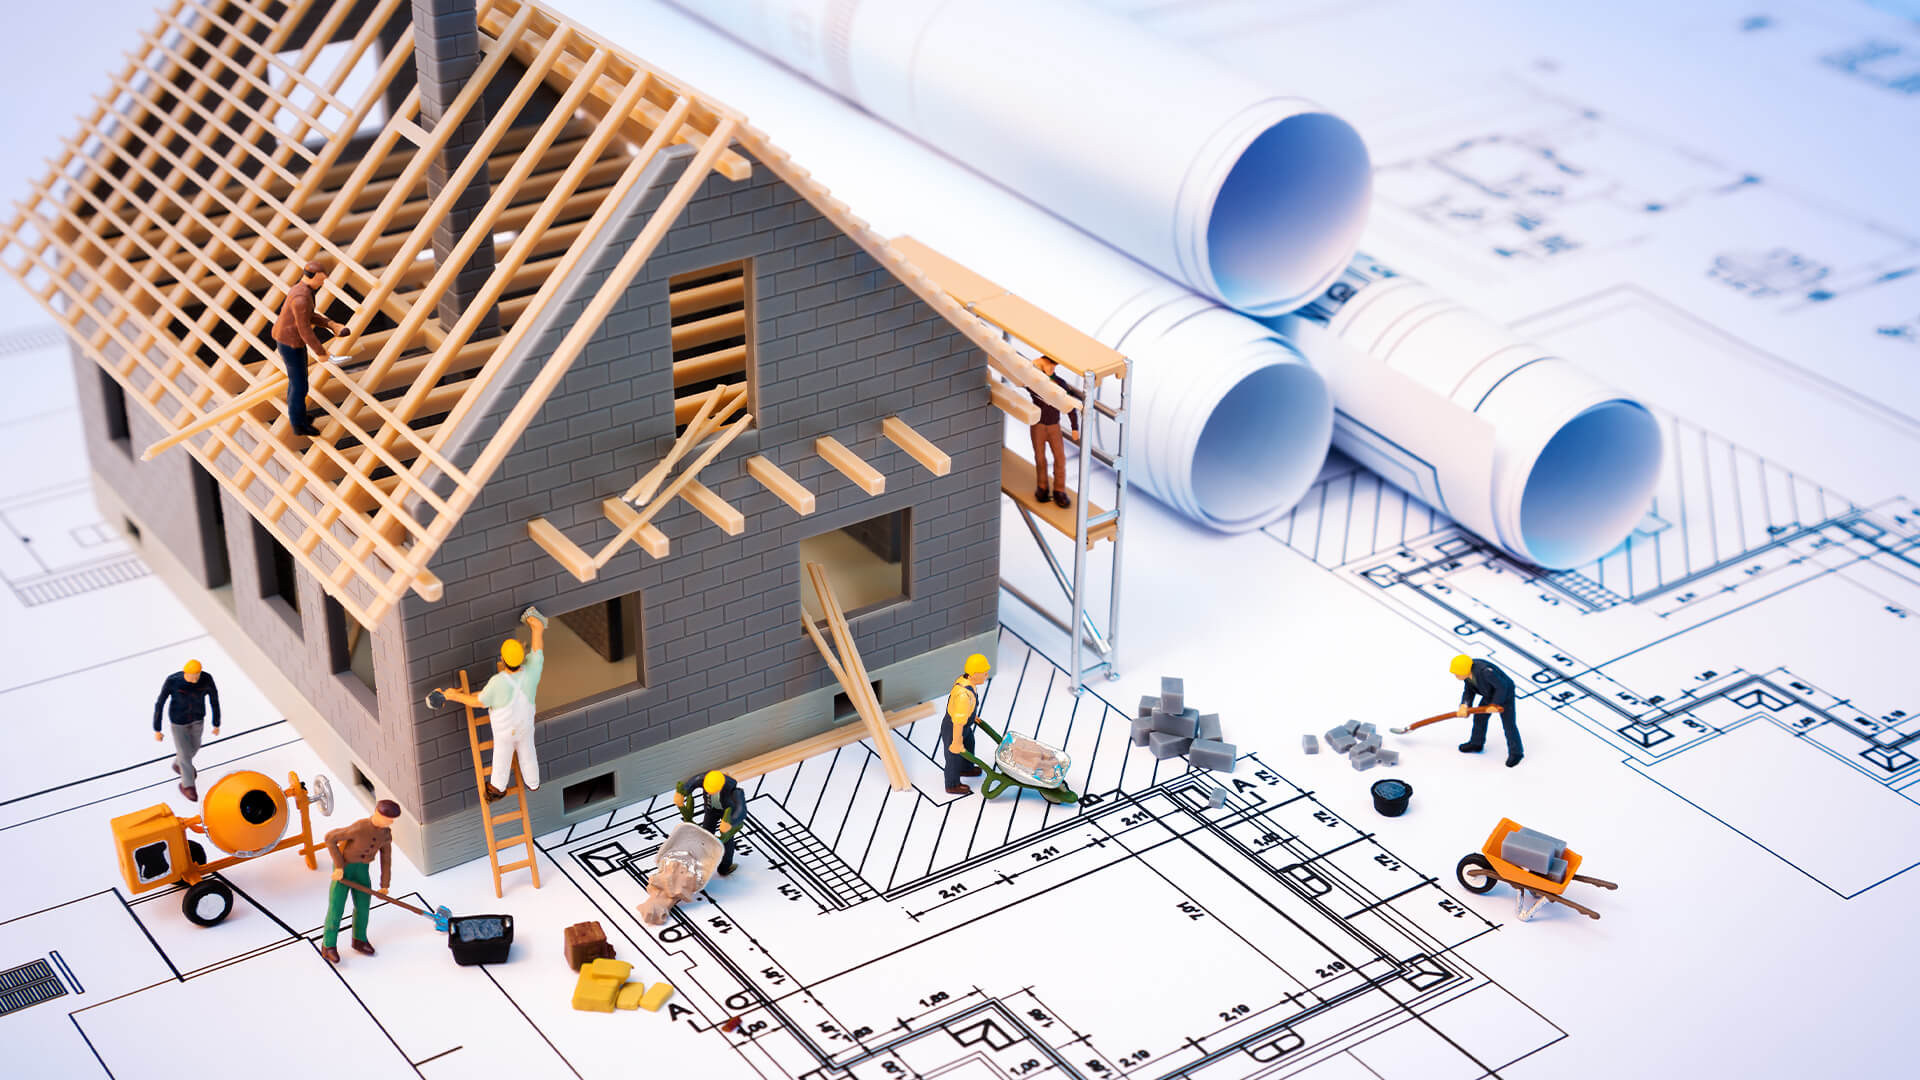

In [3]:
Image ("Images/Home builder.jpg" , width=1000, height=500)

# KINGS COUNTY HOUSE SALES ANALYSIS REPORT 

**Author: Sneha Bhaskar**

**Date**: 24 September 2023

___________________________________________

## Overview

This project analyzes the Kings County Dataset to answer the buisness case question on what type of housing features to focus when building a house and selling in Kent, Washington, United States. >>>>>>>

## Business Problem 


The Pro Home Builder Company aims to construct residences in Kent, located in Southern King County Washington, and wants to identify which housing features to focus on for maximum profitability. By understanding which amenities significantly influence home prices, the company can make data-driven choices on the types of houses to build in order to optimize profits



______________________________________________________

**Import standard packages**

In [4]:
import pandas as pd #data manipulation and analysis. Can create data frames, filter data, group by attributes, etc. 
import numpy as np #numerical python library for array manipulation, math functions etc.
import seaborn as sns #data visualization library based on Matplotlib, with higher-level functions ad nicer default styles. 

import matplotlib.pyplot as plt #2D plotting lib.
plt.style.use("ggplot") #changes the default style of Matplotlib plots to ggplot.

from statsmodels.formula.api import ols #ordinary least square (OLS) is a regression model aiming to minimise the sum of squared differences between observed and predicted values.
import statsmodels.api as sm #statsmodel includes various statistical tests, models and functions. 
from statsmodels.stats.outliers_influence import variance_inflation_factor #a measure to detect multicollinearity in regression moedels.
import scipy.stats as stats #statistical functions from the SciPy lib, which builds on NumPy. This lib also provides a large number of probability distribution, statistical functions and test for statistical analysis. 
from sklearn.linear_model import LinearRegression  #linear model
from sklearn.model_selection import train_test_split #function for splitting datasets into training and testing sets. 
from sklearn.metrics import mean_squared_error #function for computing the mean squarred error, a meausure of the average of the sqaures of the errors.
from sklearn.preprocessing import OneHotEncoder #preprocessing technique to convert categorical variables to a format that can be provided to machine learning algorithms to improve prediction 
from sklearn.model_selection import cross_val_score #function for evaluating a model using cross-validation 
from sklearn.model_selection import KFold #K-Fold cross validator
from itertools import combinations #itertools is used for generating all possible combination of the given list.

## Kings County House Dataset

In [5]:
df = pd.read_csv ('Data/kc_house_data.csv')
df

id        date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900         3       1.00         1180   
1      6414100192  12/09/2014  538000         3       2.25         2570   
2      5631500400   2/25/2015  180000         2       1.00          770   
3      2487200875  12/09/2014  604000         4       3.00         1960   
4      1954400510   2/18/2015  510000         3       2.00         1680   
...           ...         ...     ...       ...        ...          ...   
21592   263000018   5/21/2014  360000         3       2.50         1530   
21593  6600060120   2/23/2015  400000         4       2.50         2310   
21594  1523300141   6/23/2014  402101         2       0.75         1020   
21595   291310100   1/16/2015  400000         3       2.50         1600   
21596  1523300157  10/15/2014  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0         NaN   0.0  ...      7        1180   
1          7242     2.0         0.0   0.0  ...      7        2170   
2         10000     1.0         0.0   0.0  ...      6         770   
3          5000     1.0         0.0   0.0  ...      7        1050   
4          8080     1.0         0.0   0.0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                  0     1955           0.0    98178  47.5112 -122.257   
1                400     1951        1991.0    98125  47.7210 -122.319   
2                  0     1933           NaN    98028  47.7379 -122.233   
3                910     1965           0.0    98136  47.5208 -122.393   
4                  0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592              0     2009           0.0    98103  47.6993 -122.346   
21593              0     2014           0.0    98146  47.5107 -122.362   
21594              0     2009           0.0    98144  47.5944 -122.299   
21595              0     2004           0.0    98027  47.5345 -122.069   
21596              0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [6]:
#check for duplicates
df.duplicated(keep = False).sum()

0

### OBTAIN

<font color='red' >This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data we think will be necessary for solving this problem  </font>

In [7]:
#Removing columns that is not required from this dataframe for our business problem
df.drop(['id','view', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis= 1, inplace = True)
df.head()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900         3       1.00         1180      5650     1.0   
1  12/09/2014  538000         3       2.25         2570      7242     2.0   
2   2/25/2015  180000         2       1.00          770     10000     1.0   
3  12/09/2014  604000         4       3.00         1960      5000     1.0   
4   2/18/2015  510000         3       2.00         1680      8080     1.0   

   waterfront  condition  grade  sqft_above sqft_basement  yr_built  \
0         NaN          3      7        1180             0      1955   
1         0.0          3      7        2170           400      1951   
2         0.0          3      6         770             0      1933   
3         0.0          5      7        1050           910      1965   
4         0.0          3      8        1680             0      1987   

   yr_renovated  zipcode  
0           0.0    98178  
1        1991.0    98125  
2           NaN    98028  
3           0.0    98136  
4           0.0    98074

In [8]:
print("The number of rows is",df.shape[0])
print('The number of columns is',df.shape[1])

The number of rows is 21597
The number of columns is 15


### SCRUB 

<font color='red' >This step focuses on cleaning the data, which involves handling missing values, removing outliers, and converting data types and many more. Data cleaning is crucial because the quality of data affects the quality of the final model produced</font>

In [9]:
df.info() 
#all of the columns are in integer/float format except "date" and "sqft_basement" are in object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  int64  
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.5+ MB


In [10]:
df.describe()
#Bedrooms has an outliers of 33 rooms
#waterfront, condition, grade looks like a categorical data

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront     condition         grade    sqft_above  \
count  21597.000000  19221.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007596      3.409825      7.657915   1788.596842   
std        0.539683      0.086825      0.650546      1.173200    827.759761   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1190.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2210.000000   
max        3.500000      1.000000      5.000000     13.000000   9410.000000   

           yr_built  yr_renovated       zipcode  
count  21597.000000  17755.000000  21597.000000  
mean    1970.999676     83.636778  98077.951845  
std       29.375234    399.946414     53.513072  
min     1900.000000      0.000000  98001.000000  
25%     1951.000000      0.000000  98033.000000  
50%     1975.000000      0.000000  98065.000000  
75%     1997.000000      0.000000  98118.000000  
max     2015.000000   2015.000000  98199.000000

In [11]:
#check for null values 
df.isna().sum()
#waterfront and yr_renovated are the only columns with null values 

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
dtype: int64

**Flll null values for waterfront**

In [12]:
print(df.waterfront.isnull().sum())
print(df['waterfront'].value_counts())

2376
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [13]:
print('Mean = ',df['waterfront'].mean())
print('Median = ',df['waterfront'].median())

Mean =  0.007595858696217679
Median =  0.0


In [14]:
# Replace all the missing values in the waterfront column with the Median
df['waterfront'].fillna(df['waterfront'].median(), inplace=True)
df['waterfront'].isnull().sum()

0

In [15]:
df

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      10/13/2014  221900         3       1.00         1180      5650     1.0   
1      12/09/2014  538000         3       2.25         2570      7242     2.0   
2       2/25/2015  180000         2       1.00          770     10000     1.0   
3      12/09/2014  604000         4       3.00         1960      5000     1.0   
4       2/18/2015  510000         3       2.00         1680      8080     1.0   
...           ...     ...       ...        ...          ...       ...     ...   
21592   5/21/2014  360000         3       2.50         1530      1131     3.0   
21593   2/23/2015  400000         4       2.50         2310      5813     2.0   
21594   6/23/2014  402101         2       0.75         1020      1350     2.0   
21595   1/16/2015  400000         3       2.50         1600      2388     2.0   
21596  10/15/2014  325000         2       0.75         1020      1076     2.0   

       waterfront  condition  grade  sqft_above sqft_basement  yr_built  \
0             0.0          3      7        1180             0      1955   
1             0.0          3      7        2170           400      1951   
2             0.0          3      6         770             0      1933   
3             0.0          5      7        1050           910      1965   
4             0.0          3      8        1680             0      1987   
...           ...        ...    ...         ...           ...       ...   
21592         0.0          3      8        1530             0      2009   
21593         0.0          3      8        2310             0      2014   
21594         0.0          3      7        1020             0      2009   
21595         0.0          3      8        1600             0      2004   
21596         0.0          3      7        1020             0      2008   

       yr_renovated  zipcode  
0               0.0    98178  
1            1991.0    98125  
2               NaN    98028  
3               0.0    98136  
4               0.0    98074  
...             ...      ...  
21592           0.0    98103  
21593           0.0    98146  
21594           0.0    98144  
21595           0.0    98027  
21596           0.0    98144  

[21597 rows x 15 columns]

**Create a new column to replace the yr_renovated where 1 = Renovated and 0 = Not renovated**

In [16]:
df.yr_renovated.mean()

83.6367783722895

In [17]:
df.yr_renovated.median()

0.0

In [18]:
df.yr_renovated.fillna(df.yr_renovated.median(),inplace=True)
df.yr_renovated.isnull().sum()

0

In [19]:
df['renovated'] = np.where(df['yr_renovated'] == 0, 0, 1)

In [20]:
#drop the "yr_rnovated" colum
df.drop('yr_renovated',axis=1, inplace = True)

In [21]:
df

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      10/13/2014  221900         3       1.00         1180      5650     1.0   
1      12/09/2014  538000         3       2.25         2570      7242     2.0   
2       2/25/2015  180000         2       1.00          770     10000     1.0   
3      12/09/2014  604000         4       3.00         1960      5000     1.0   
4       2/18/2015  510000         3       2.00         1680      8080     1.0   
...           ...     ...       ...        ...          ...       ...     ...   
21592   5/21/2014  360000         3       2.50         1530      1131     3.0   
21593   2/23/2015  400000         4       2.50         2310      5813     2.0   
21594   6/23/2014  402101         2       0.75         1020      1350     2.0   
21595   1/16/2015  400000         3       2.50         1600      2388     2.0   
21596  10/15/2014  325000         2       0.75         1020      1076     2.0   

       waterfront  condition  grade  sqft_above sqft_basement  yr_built  \
0             0.0          3      7        1180             0      1955   
1             0.0          3      7        2170           400      1951   
2             0.0          3      6         770             0      1933   
3             0.0          5      7        1050           910      1965   
4             0.0          3      8        1680             0      1987   
...           ...        ...    ...         ...           ...       ...   
21592         0.0          3      8        1530             0      2009   
21593         0.0          3      8        2310             0      2014   
21594         0.0          3      7        1020             0      2009   
21595         0.0          3      8        1600             0      2004   
21596         0.0          3      7        1020             0      2008   

       zipcode  renovated  
0        98178          0  
1        98125          1  
2        98028          0  
3        98136          0  
4        98074          0  
...        ...        ...  
21592    98103          0  
21593    98146          0  
21594    98144          0  
21595    98027          0  
21596    98144          0  

[21597 rows x 15 columns]

In [22]:
df.renovated.value_counts()

0    20853
1      744
Name: renovated, dtype: int64

**Clean "Sqft_Basement" column by replacing '?' with 0 and converting the data type from object ot float**

In [23]:
df.sqft_basement.value_counts()

0       12826
?         454
600       217
500       209
700       208
        ...  
1920        1
3480        1
2730        1
2720        1
248         1
Name: sqft_basement, Length: 304, dtype: int64

In [24]:
#replace the '?' in the besement column with 0
df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value='0.0')

In [25]:
df.sqft_basement.value_counts()

0       12826
0.0       454
600       217
500       209
700       208
        ...  
1920        1
3480        1
2730        1
2720        1
248         1
Name: sqft_basement, Length: 304, dtype: int64

In [26]:
#convert the data type of 'sqft_basement' from object to float
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [27]:
#confirm we don't have any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  int64  
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  renovated      21597 non-null  int32  
dtypes: float64(4), int32(1), int64(9), object(1)
memory usage: 2.4+ MB


In [28]:
#check the data statistics
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront     condition         grade    sqft_above  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      3.409825      7.657915   1788.596842   
std        0.539683      0.081944      0.650546      1.173200    827.759761   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1190.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2210.000000   
max        3.500000      1.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built       zipcode     renovated  
count   21597.000000  21597.000000  21597.000000  21597.000000  
mean      285.716581   1970.999676  98077.951845      0.034449  
std       439.819830     29.375234     53.513072      0.182384  
min         0.000000   1900.000000  98001.000000      0.000000  
25%         0.000000   1951.000000  98033.000000      0.000000  
50%         0.000000   1975.000000  98065.000000      0.000000  
75%       550.000000   1997.000000  98118.000000      0.000000  
max      4820.000000   2015.000000  98199.000000      1.000000

## PRICE

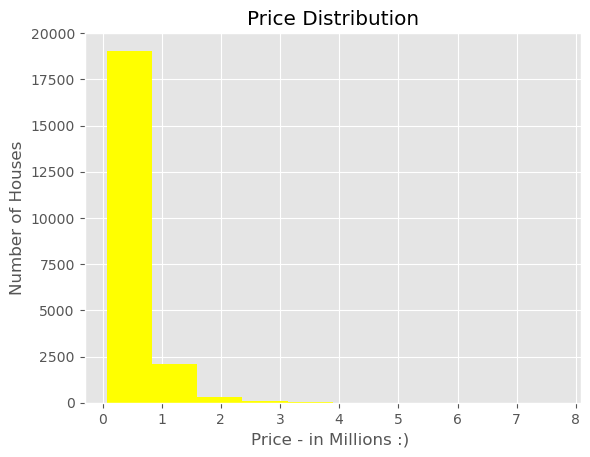

In [29]:
# Check price distribution
df['price'].div(1000000).hist(color = "yellow")
plt.title('Price Distribution');
plt.xlabel('Price - in Millions :) ');
plt.ylabel('Number of Houses');

#the majority of houses are below the price of 2 million 

In [30]:
#reduce the data to only houses equal to or below 1.5 million 
df_og = df.copy()
# remove houses above 1.5 million, boolean mask
df = df[df['price'] <= 1500000]

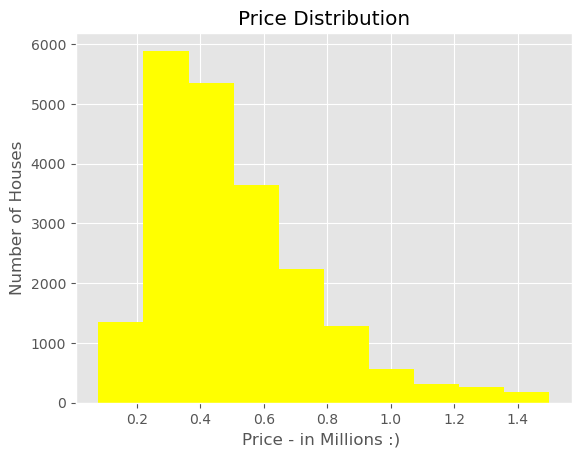

In [31]:
# RECHECK price distribution
df['price'].div(1000000).hist(color = "yellow")
plt.title('Price Distribution');
plt.xlabel('Price - in Millions :) ');
plt.ylabel('Number of Houses');



**Majority of the houses are in between 0.3 - 0.5 price range**

## BEDROOMS

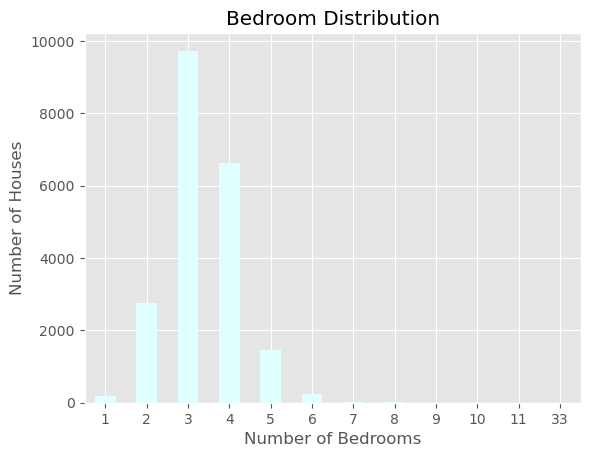

In [32]:
# Plot bedrooms as categorical - ordinal
df['bedrooms'].value_counts().sort_index().plot(kind = 'bar', color = "lightcyan")
plt.xticks(rotation = 0);
plt.title('Bedroom Distribution');
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of Houses');


In [33]:
#reduce the data to only bedrooms equal to or below 6
df_og = df.copy()
# remove bedrooms  above 6, boolean mask
df = df[df['bedrooms'] <=6]

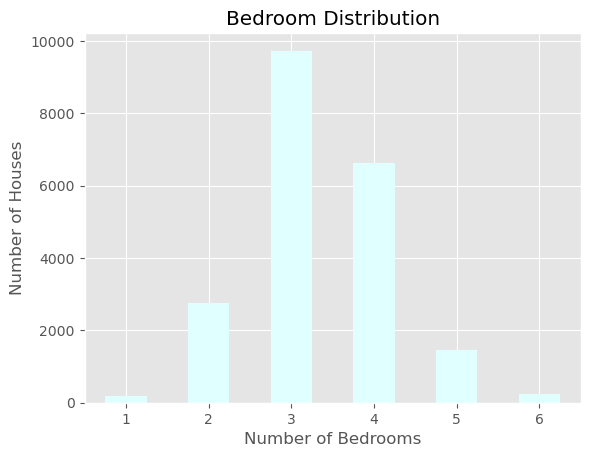

In [34]:
# Plot bedrooms as categorical - ordinal
df['bedrooms'].value_counts().sort_index().plot(kind = 'bar', color = "lightcyan")
plt.xticks(rotation = 0);
plt.title('Bedroom Distribution');
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of Houses'); 

#by removings the 33 outliers for bedrooms , its summarises that houses with 3 or 4 bedrooms are the most common in the dataset. 

**Houses with 3 or 4 bedrooms are the most common in the dataset**

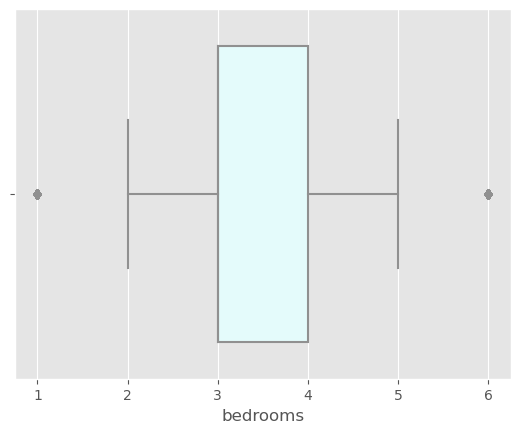

In [35]:
sns.boxplot(x = df['bedrooms'], color = "lightcyan");

#Boxplot shows are normal distribution

## BATHROOMS

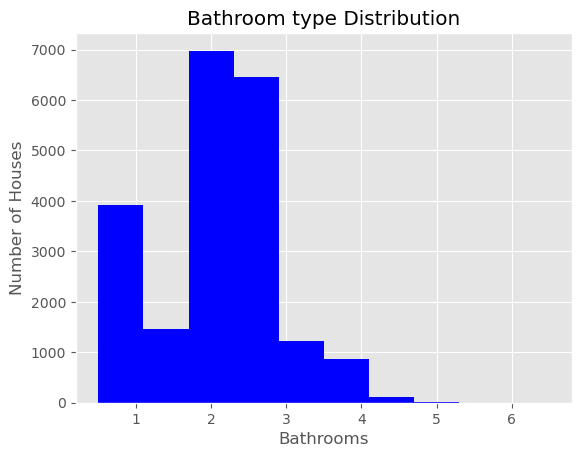

In [36]:
# Check bathroom types distribution
df['bathrooms'].hist(color = "BLUE")
plt.title('Bathroom type Distribution');
plt.xlabel('Bathrooms');
plt.ylabel('Number of Houses');

**There appears to be an outlier and most of the houses have 2 or 3 bathrooms**

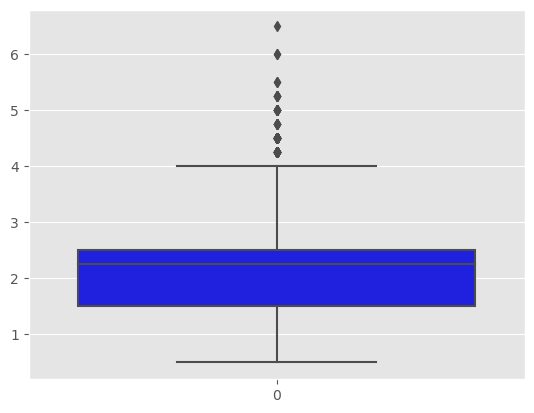

In [37]:
# Boxplot to detect outliers
sns.boxplot(df['bathrooms'], color = "BLUE");

#there are handfull of outliers above 4 

In [38]:
# Drop houses that have more than 4 bathrooms
df = df[df['bathrooms'] < 4]

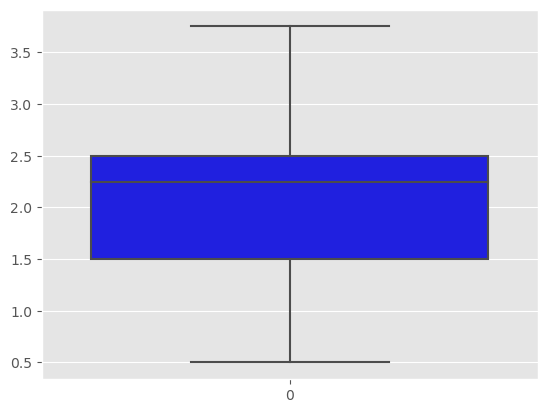

In [39]:
# Boxplot to detect outliers
sns.boxplot(df['bathrooms'], color = "BLUE");

#Boxplot shows are normal distribution

## SQFT_LIVING

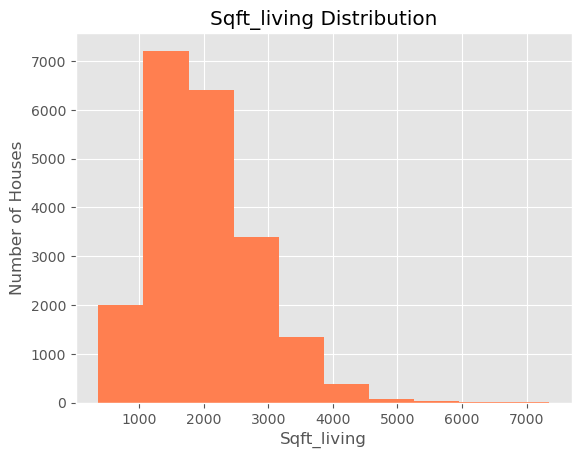

In [40]:
# Check sqft_living distribution
df['sqft_living'].hist(color = "coral")
plt.title('Sqft_living Distribution');
plt.xlabel('Sqft_living');
plt.ylabel('Number of Houses');

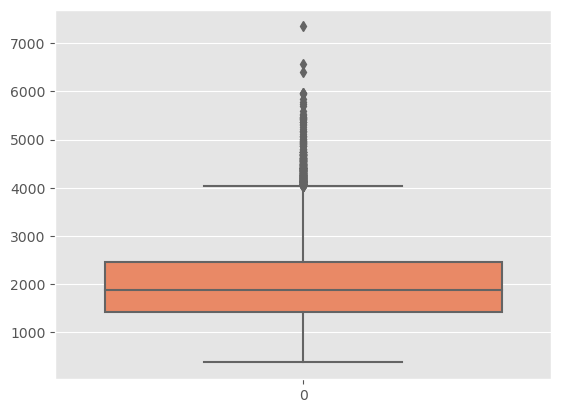

In [41]:
# Box plot for outliers
#There are outliers above 4000 sqft_living.
sns.boxplot(df['sqft_living'], color = "coral");

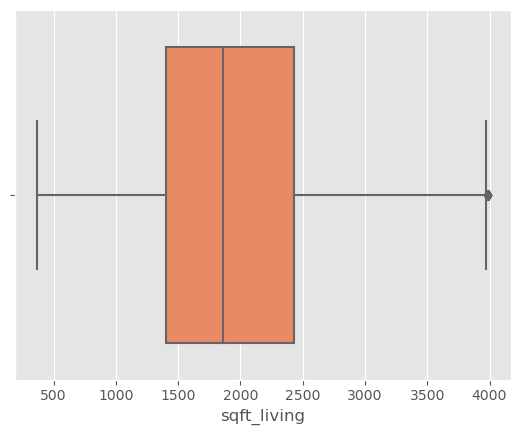

In [42]:
# Drop outliers in sqft_living
df = df[df['sqft_living'] < 4000]
sns.boxplot(x = df['sqft_living'], color = "coral");

**1500 - 2500 sqft_living is most commonly observed footage of the house in this dataset**

## SQFT_LOT

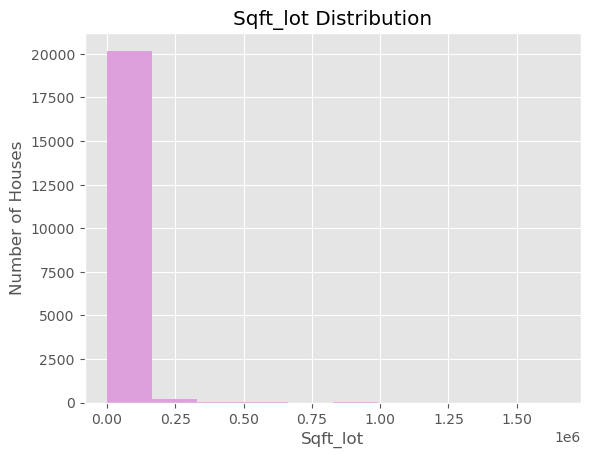

In [43]:
# Check sqft_lot distribution
df['sqft_lot'].hist(color = "plum")
plt.title('Sqft_lot Distribution');
plt.xlabel('Sqft_lot');
plt.ylabel('Number of Houses');

In [44]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.044600e+04  20446.000000  20446.000000  20446.000000  2.044600e+04   
mean   4.872377e+05      3.310036      2.033735   1954.156705  1.399462e+04   
std    2.327866e+05      0.850293      0.676472    724.038899  3.766160e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.150000e+05      3.000000      1.500000   1400.000000  5.000000e+03   
50%    4.380000e+05      3.000000      2.000000   1860.000000  7.500000e+03   
75%    6.050000e+05      4.000000      2.500000   2430.000000  1.023275e+04   
max    1.500000e+06      6.000000      3.750000   3990.000000  1.651359e+06   

             floors    waterfront     condition         grade    sqft_above  \
count  20446.000000  20446.000000  20446.000000  20446.000000  20446.000000   
mean       1.472684      0.003473      3.412990      7.531155   1689.134892   
std        0.536808      0.058827      0.651379      1.028564    687.127178   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1170.000000   
50%        1.000000      0.000000      3.000000      7.000000   1520.000000   
75%        2.000000      0.000000      4.000000      8.000000   2090.000000   
max        3.500000      1.000000      5.000000     11.000000   3990.000000   

       sqft_basement      yr_built       zipcode     renovated  
count   20446.000000  20446.000000  20446.000000  20446.000000  
mean      259.663602   1970.357332  98078.832290      0.031840  
std       398.548166     29.259615     53.520325      0.175578  
min         0.000000   1900.000000  98001.000000      0.000000  
25%         0.000000   1951.000000  98033.000000      0.000000  
50%         0.000000   1973.000000  98070.000000      0.000000  
75%       500.000000   1995.000000  98118.000000      0.000000  
max      2000.000000   2015.000000  98199.000000      1.000000

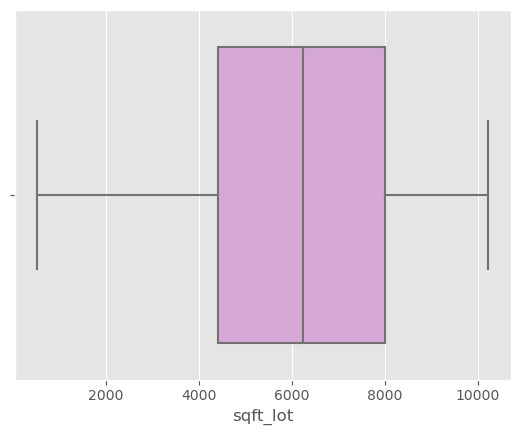

In [45]:
# Drop houses that are above the 75 percentile
df = df[df['sqft_lot'] < 1.023275e+04]
sns.boxplot(x = df['sqft_lot'], color = "plum");

**The majority of houses have between 4000 and 8000 sqft_lot.**

## FLOORS

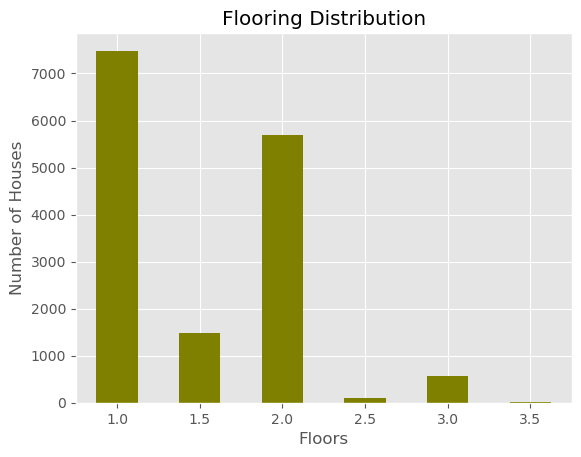

In [46]:
# Plot a bar chart to check distribution of flooring
df['floors'].value_counts().sort_index().plot(kind = 'bar', color = "OLIVE")
plt.xticks(rotation = 0)
plt.title('Flooring Distribution');
plt.xlabel('Floors');
plt.ylabel('Number of Houses');

**Most houses have either 1 or 2 floors.**

In [47]:
#checking data types 
df.dtypes

date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
zipcode            int64
renovated          int32
dtype: object

### EXPLORE 

<font color='red' > After cleaning the data, I then explore it to understand its structure, trends, and patterns. This typically involves generating descriptive statistics, and visualizing the data using various kinds of plots. The goal is to gain insights that will help you when modeling.  </font>

## Identify categorical variables, dummy implementation

In [48]:
df

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      10/13/2014  221900         3       1.00         1180      5650     1.0   
1      12/09/2014  538000         3       2.25         2570      7242     2.0   
2       2/25/2015  180000         2       1.00          770     10000     1.0   
3      12/09/2014  604000         4       3.00         1960      5000     1.0   
4       2/18/2015  510000         3       2.00         1680      8080     1.0   
...           ...     ...       ...        ...          ...       ...     ...   
21592   5/21/2014  360000         3       2.50         1530      1131     3.0   
21593   2/23/2015  400000         4       2.50         2310      5813     2.0   
21594   6/23/2014  402101         2       0.75         1020      1350     2.0   
21595   1/16/2015  400000         3       2.50         1600      2388     2.0   
21596  10/15/2014  325000         2       0.75         1020      1076     2.0   

       waterfront  condition  grade  sqft_above  sqft_basement  yr_built  \
0             0.0          3      7        1180            0.0      1955   
1             0.0          3      7        2170          400.0      1951   
2             0.0          3      6         770            0.0      1933   
3             0.0          5      7        1050          910.0      1965   
4             0.0          3      8        1680            0.0      1987   
...           ...        ...    ...         ...            ...       ...   
21592         0.0          3      8        1530            0.0      2009   
21593         0.0          3      8        2310            0.0      2014   
21594         0.0          3      7        1020            0.0      2009   
21595         0.0          3      8        1600            0.0      2004   
21596         0.0          3      7        1020            0.0      2008   

       zipcode  renovated  
0        98178          0  
1        98125          1  
2        98028          0  
3        98136          0  
4        98074          0  
...        ...        ...  
21592    98103          0  
21593    98146          0  
21594    98144          0  
21595    98027          0  
21596    98144          0  

[15334 rows x 15 columns]

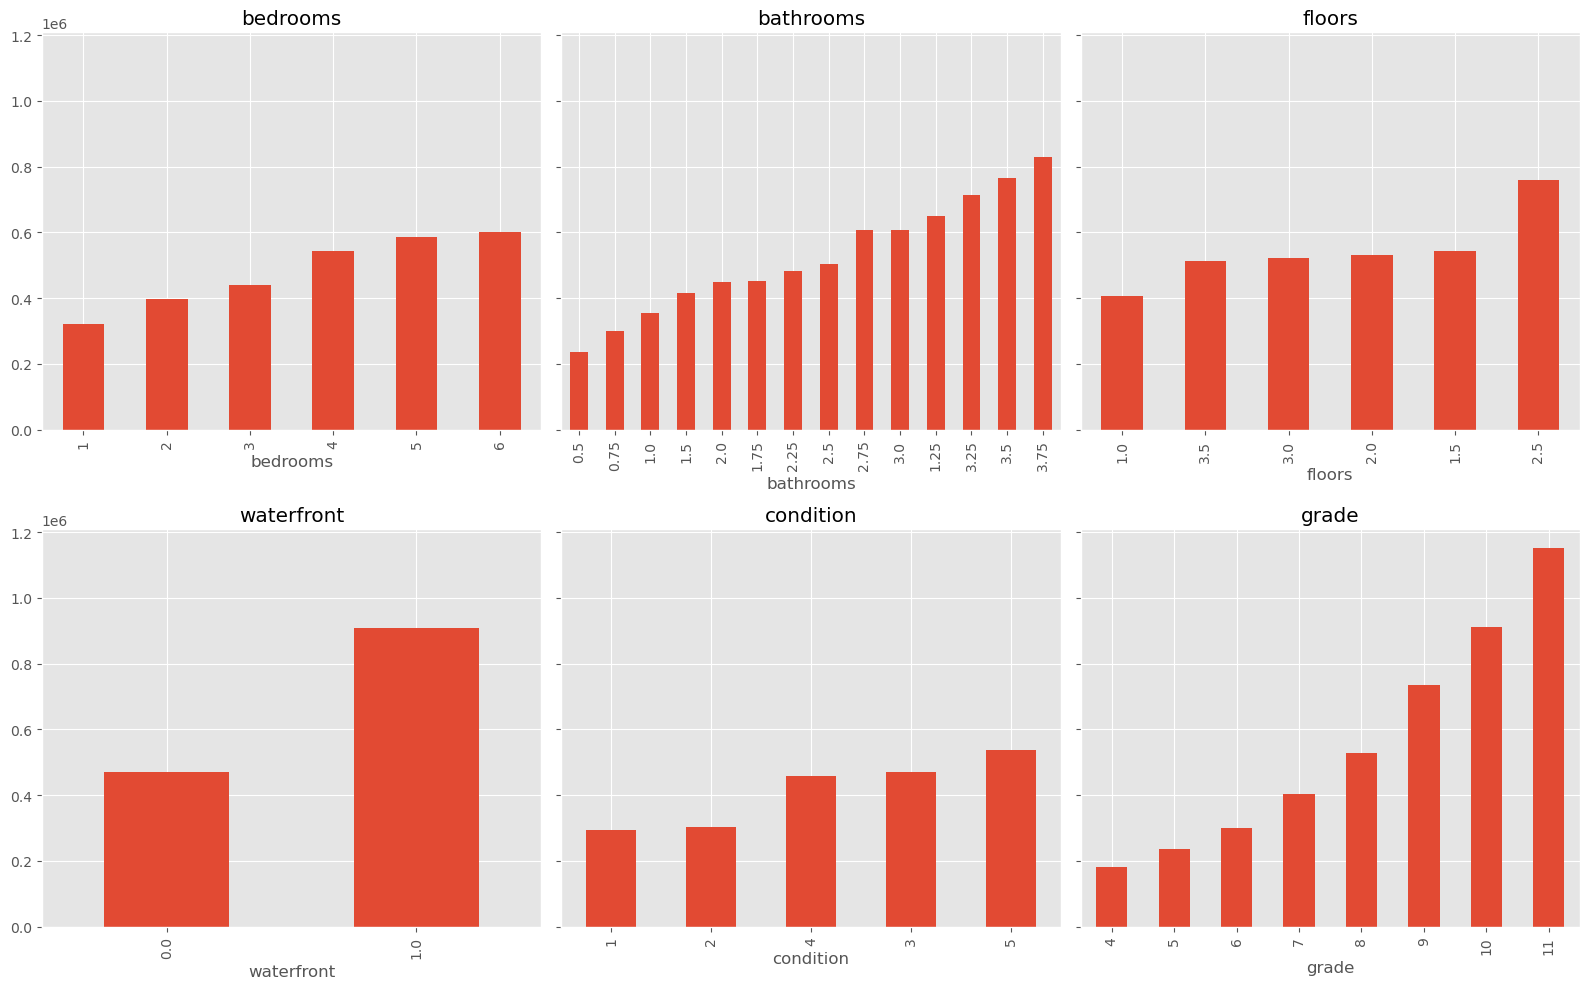

In [49]:
#Plot Categorical Variables
#Pick 6 categorical variables and plot them against Price with a bar graph for each variable. All 6 bar graphs should be on the same figure.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharey=True)

categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)                  # group values together by column of interest
         .mean(numeric_only=True)     # explicitly specify numeric_only=True
         ['price']                    # take the mean of the saleprice for each group
         .sort_values()               # sort the groups in ascending order
         .plot
         .bar(ax=ax))                 # create a bar graph on the ax
    
    ax.set_title(col)                 # Make the title the name of the column

fig.tight_layout()

From this we can see that bedrooms, bathrooms, floors, waterfront, condition, grade is catergorical value 

**Create dummy variables for the six categorical features** 

In [50]:

# Create dummy variables for the categorical columns
df_dummies = pd.get_dummies(df, columns=categoricals, drop_first=True)


# Check the new DataFrame
print(df_dummies.head())



         date   price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
0  10/13/2014  221900         1180      5650        1180            0.0   
1  12/09/2014  538000         2570      7242        2170          400.0   
2   2/25/2015  180000          770     10000         770            0.0   
3  12/09/2014  604000         1960      5000        1050          910.0   
4   2/18/2015  510000         1680      8080        1680            0.0   

   yr_built  zipcode  renovated  bedrooms_2  ...  condition_3  condition_4  \
0      1955    98178          0           0  ...            1            0   
1      1951    98125          1           0  ...            1            0   
2      1933    98028          0           1  ...            1            0   
3      1965    98136          0           0  ...            0            0   
4      1987    98074          0           0  ...            1            0   

   condition_5  grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  \
0      

## Check for multicollinearity

### Scatter matrix

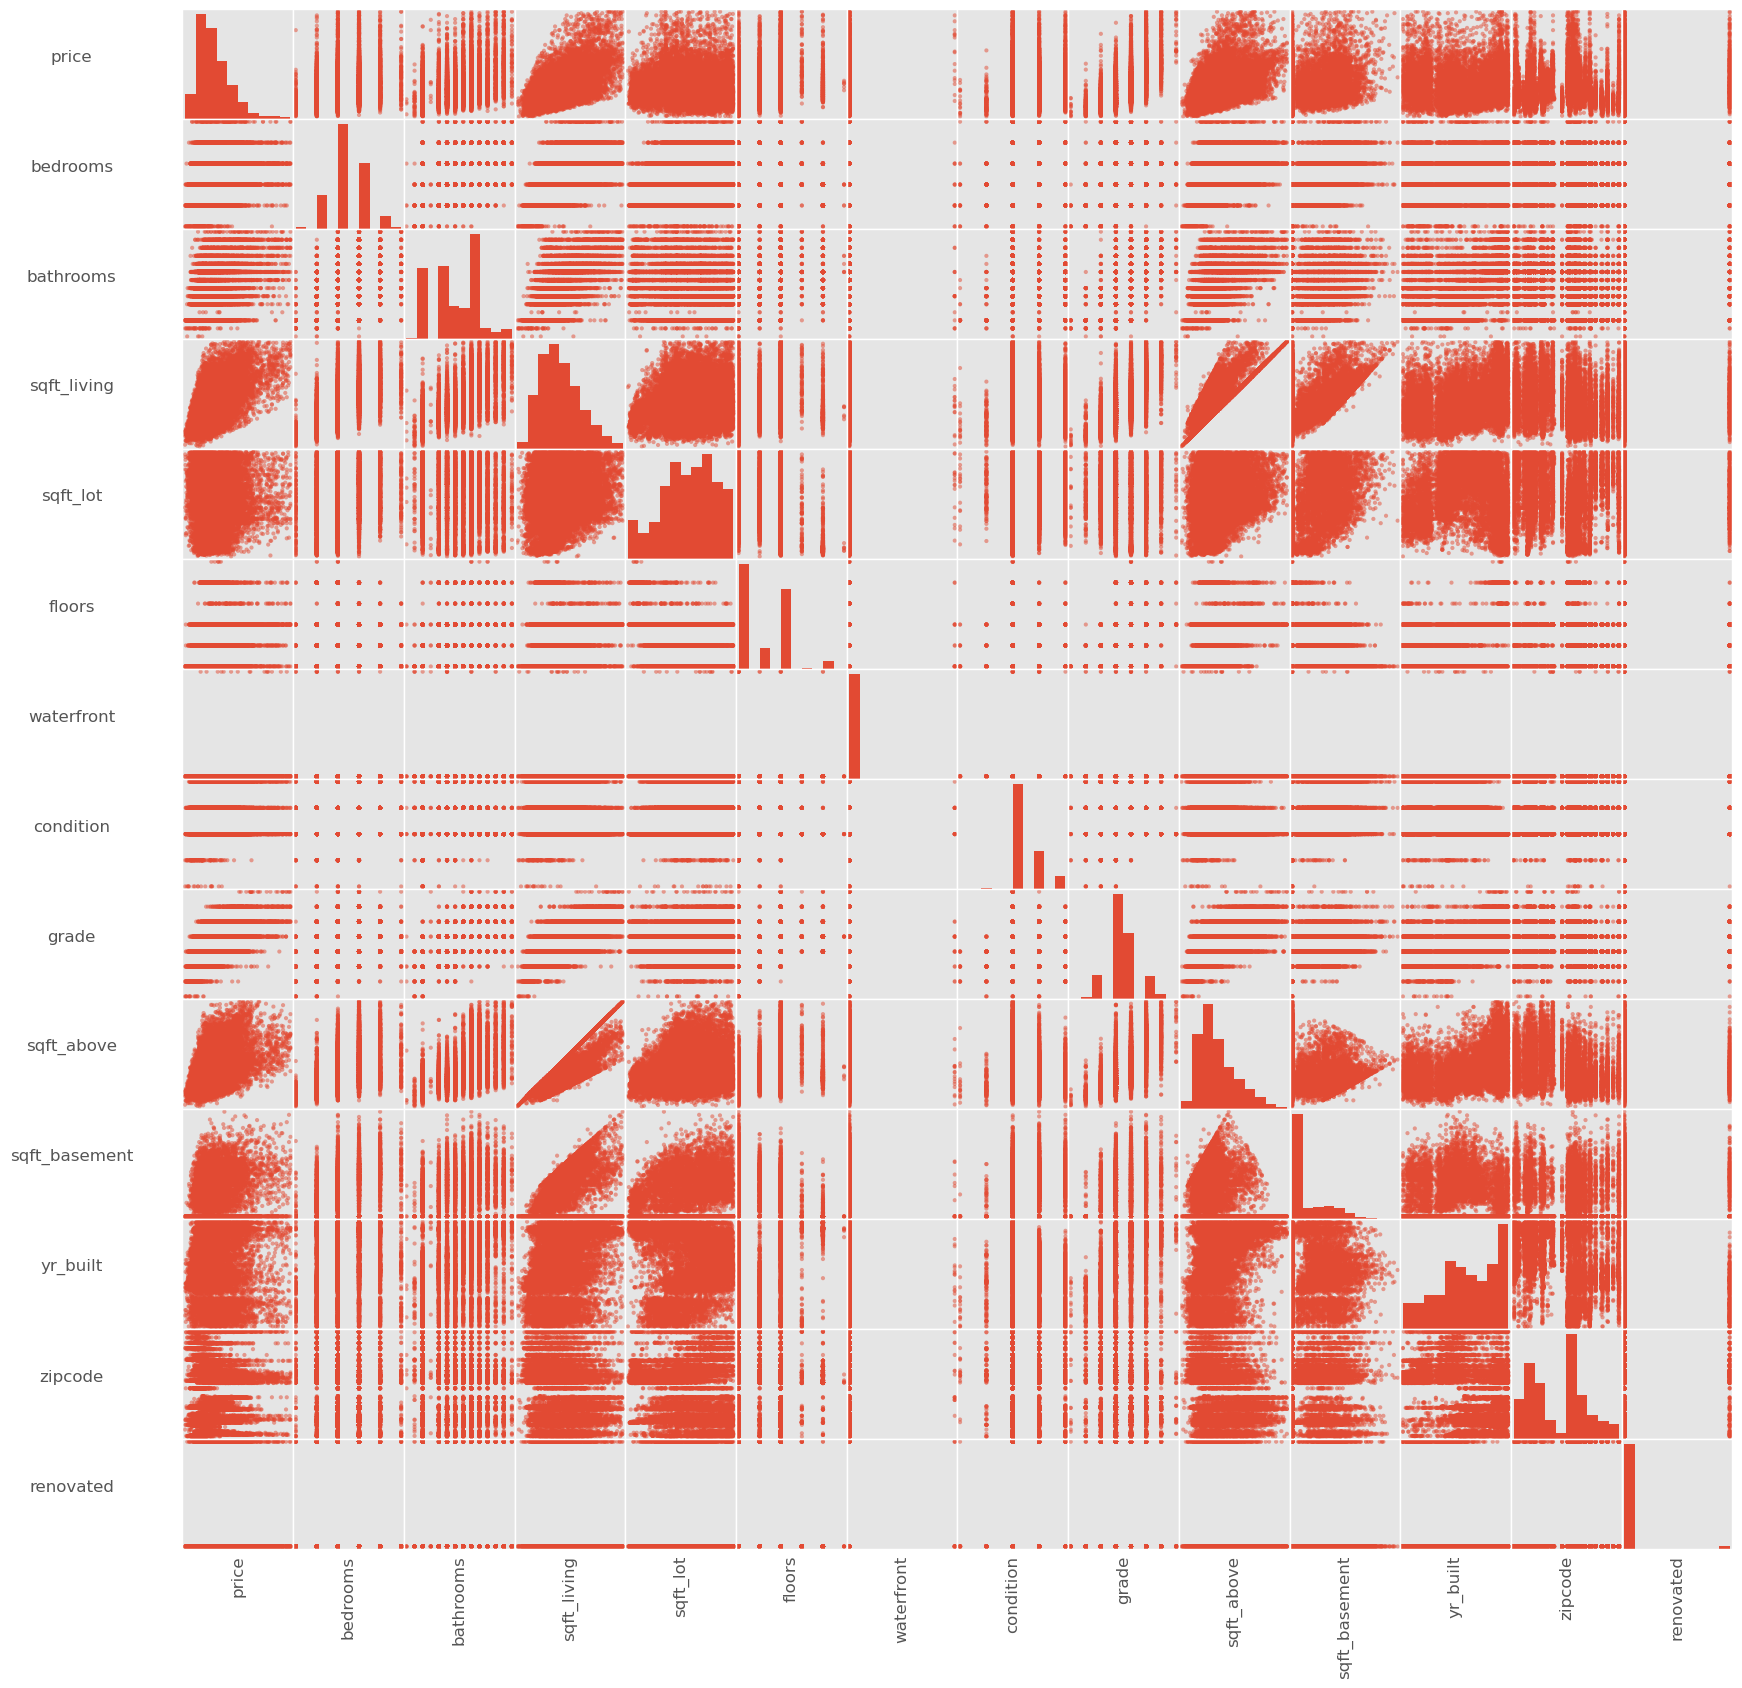

In [51]:
sm = pd.plotting.scatter_matrix(df, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

### Correlation matrix

In [52]:
#Correlation matrix
df.corr(numeric_only=True)

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.270020   0.401291     0.582435 -0.091096  0.258474   
bedrooms       0.270020  1.000000   0.484538     0.628025  0.230280  0.159391   
bathrooms      0.401291  0.484538   1.000000     0.701893 -0.092625  0.533343   
sqft_living    0.582435  0.628025   0.701893     1.000000  0.171210  0.343853   
sqft_lot      -0.091096  0.230280  -0.092625     0.171210  1.000000 -0.449486   
floors         0.258474  0.159391   0.533343     0.343853 -0.449486  1.000000   
waterfront     0.062988 -0.026551  -0.009154    -0.006088  0.007880  0.003375   
condition      0.062857  0.015076  -0.152621    -0.069797  0.143082 -0.284153   
grade          0.600733  0.325391   0.608525     0.670470 -0.047194  0.487685   
sqft_above     0.456314  0.507400   0.626796     0.840791  0.136252  0.537249   
sqft_basement  0.269508  0.262739   0.194036     0.365580  0.077200 -0.294297   
yr_built      -0.033115  0.165549   0.555123     0.328073 -0.089224  0.523722   
zipcode        0.058303 -0.169524  -0.225719    -0.192169 -0.245899 -0.083009   
renovated      0.107844  0.003951   0.026586     0.031777 -0.014106 -0.006285   

               waterfront  condition     grade  sqft_above  sqft_basement  \
price            0.062988   0.062857  0.600733    0.456314       0.269508   
bedrooms        -0.026551   0.015076  0.325391    0.507400       0.262739   
bathrooms       -0.009154  -0.152621  0.608525    0.626796       0.194036   
sqft_living     -0.006088  -0.069797  0.670470    0.840791       0.365580   
sqft_lot         0.007880   0.143082 -0.047194    0.136252       0.077200   
floors           0.003375  -0.284153  0.487685    0.537249      -0.294297   
waterfront       1.000000   0.008267 -0.006307   -0.007722       0.002646   
condition        0.008267   1.000000 -0.179764   -0.195686       0.203915   
grade           -0.006307  -0.179764  1.000000    0.667652       0.069011   
sqft_above      -0.007722  -0.195686  0.667652    1.000000      -0.188163   
sqft_basement    0.002646   0.203915  0.069011   -0.188163       1.000000   
yr_built        -0.016596  -0.381176  0.470614    0.461067      -0.193127   
zipcode          0.017435   0.022597 -0.162900   -0.288266       0.143544   
renovated        0.029324  -0.052992  0.007918   -0.001392       0.059103   

               yr_built   zipcode  renovated  
price         -0.033115  0.058303   0.107844  
bedrooms       0.165549 -0.169524   0.003951  
bathrooms      0.555123 -0.225719   0.026586  
sqft_living    0.328073 -0.192169   0.031777  
sqft_lot      -0.089224 -0.245899  -0.014106  
floors         0.523722 -0.083009  -0.006285  
waterfront    -0.016596  0.017435   0.029324  
condition     -0.381176  0.022597  -0.052992  
grade          0.470614 -0.162900   0.007918  
sqft_above     0.461067 -0.288266  -0.001392  
sqft_basement -0.193127  0.143544   0.059103  
yr_built       1.000000 -0.363468  -0.196198  
zipcode       -0.363468  1.000000   0.077004  
renovated     -0.196198  0.077004   1.000000

In [53]:
#Return True for positive or negative correlations that are bigger than 0.75 in the correlation matrix:
abs(df.corr(numeric_only=True)) > 0.75

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False        False     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True        False     False   False   
sqft_living    False     False      False         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade          False     False      False        False     False   False   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_built       False     False      False        False     False   False   
zipcode        False     False      False        False     False   False   
renovated      False     False      False        False     False   False   

               waterfront  condition  grade  sqft_above  sqft_basement  \
price               False      False  False       False          False   
bedrooms            False      False  False       False          False   
bathrooms           False      False  False       False          False   
sqft_living         False      False  False        True          False   
sqft_lot            False      False  False       False          False   
floors              False      False  False       False          False   
waterfront           True      False  False       False          False   
condition           False       True  False       False          False   
grade               False      False   True       False          False   
sqft_above          False      False  False        True          False   
sqft_basement       False      False  False       False           True   
yr_built            False      False  False       False          False   
zipcode             False      False  False       False          False   
renovated           False      False  False       False          False   

               yr_built  zipcode  renovated  
price             False    False      False  
bedrooms          False    False      False  
bathrooms         False    False      False  
sqft_living       False    False      False  
sqft_lot          False    False      False  
floors            False    False      False  
waterfront        False    False      False  
condition         False    False      False  
grade             False    False      False  
sqft_above        False    False      False  
sqft_basement     False    False      False  
yr_built           True    False      False  
zipcode           False     True      False  
renovated         False    False       True

Now, include stack and zip to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.

In [54]:
df1 = df.corr(numeric_only=True).abs().stack().reset_index().sort_values(0, ascending=False)


df1['pairs'] = list(zip(df1.level_0, df1.level_1))

df1.set_index(['pairs'], inplace = True)

df1.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df1.columns = ['cc']

df1.drop_duplicates(inplace=True)

df1[(df1.cc>.75) & (df1.cc<1)]


cc
pairs                              
(sqft_above, sqft_living)  0.840791

### Heatmap

In [55]:
# View columns
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'renovated'],
      dtype='object')

In [56]:
# Create a list of continuous and ordinal categorical features
cont_ordinal = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade','sqft_living', 'sqft_lot','sqft_above','sqft_basement']

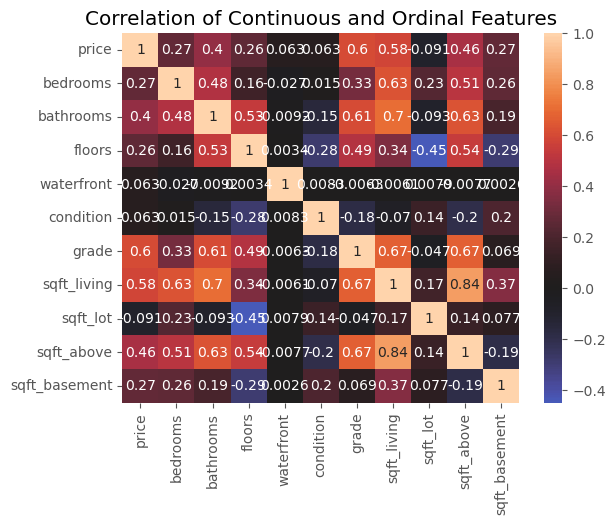

In [57]:
# Correlation heat map with continuous and ordinal features
corr = df[cont_ordinal].corr()
sns.heatmap(corr, center=0, annot=True).set_title('Correlation of Continuous and Ordinal Features');

In [58]:
df

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      10/13/2014  221900         3       1.00         1180      5650     1.0   
1      12/09/2014  538000         3       2.25         2570      7242     2.0   
2       2/25/2015  180000         2       1.00          770     10000     1.0   
3      12/09/2014  604000         4       3.00         1960      5000     1.0   
4       2/18/2015  510000         3       2.00         1680      8080     1.0   
...           ...     ...       ...        ...          ...       ...     ...   
21592   5/21/2014  360000         3       2.50         1530      1131     3.0   
21593   2/23/2015  400000         4       2.50         2310      5813     2.0   
21594   6/23/2014  402101         2       0.75         1020      1350     2.0   
21595   1/16/2015  400000         3       2.50         1600      2388     2.0   
21596  10/15/2014  325000         2       0.75         1020      1076     2.0   

       waterfront  condition  grade  sqft_above  sqft_basement  yr_built  \
0             0.0          3      7        1180            0.0      1955   
1             0.0          3      7        2170          400.0      1951   
2             0.0          3      6         770            0.0      1933   
3             0.0          5      7        1050          910.0      1965   
4             0.0          3      8        1680            0.0      1987   
...           ...        ...    ...         ...            ...       ...   
21592         0.0          3      8        1530            0.0      2009   
21593         0.0          3      8        2310            0.0      2014   
21594         0.0          3      7        1020            0.0      2009   
21595         0.0          3      8        1600            0.0      2004   
21596         0.0          3      7        1020            0.0      2008   

       zipcode  renovated  
0        98178          0  
1        98125          1  
2        98028          0  
3        98136          0  
4        98074          0  
...        ...        ...  
21592    98103          0  
21593    98146          0  
21594    98144          0  
21595    98027          0  
21596    98144          0  

[15334 rows x 15 columns]

Can see a correlatation between (sqft_above, sqft_living) is 0.840791

In [59]:
#Removing columns that is not required from this dataframe for our business problem
df.drop(['date'], axis= 1, inplace = True)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900         3       1.00         1180      5650     1.0         0.0   
1  538000         3       2.25         2570      7242     2.0         0.0   
2  180000         2       1.00          770     10000     1.0         0.0   
3  604000         4       3.00         1960      5000     1.0         0.0   
4  510000         3       2.00         1680      8080     1.0         0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  zipcode  renovated  
0          3      7        1180            0.0      1955    98178          0  
1          3      7        2170          400.0      1951    98125          1  
2          3      6         770            0.0      1933    98028          0  
3          5      7        1050          910.0      1965    98136          0  
4          3      8        1680            0.0      1987    98074          0

# MODEL 1 

In [60]:
train, test = train_test_split(df, random_state = 86)
train.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1105   1130000         4       2.50         3160      8281     2.0   
10625   995000         3       2.25         3200      3800     2.0   
8097    444950         3       1.00         1760      6927     1.0   
20328  1210000         5       3.50         3220      8000     2.0   
18003   477500         4       1.75         1860      9364     1.0   

       waterfront  condition  grade  sqft_above  sqft_basement  yr_built  \
1105          0.0          4      9        3160            0.0      1995   
10625         0.0          5      9        2650          550.0      1914   
8097          0.0          3      7        1050          710.0      1962   
20328         0.0          3      9        2900          320.0      2008   
18003         0.0          3      7        1080          780.0      1953   

       zipcode  renovated  
1105     98033          0  
10625    98102          0  
8097     98011          0  
20328    98033          0  
18003    98125          0

In [61]:
# Create model function to fit a linear regression that includes rmse
def model(train, test):
  
  target = 'price'
  x_cols = list(train.columns)
  x_cols.remove('price')

  predictors = '+'.join(x_cols)
  formula = target + '~' + predictors
  model = ols(formula=formula, data=train).fit()

  # RMSE
  train_err = (mean_squared_error(train['price'], model.predict(train)))**0.5
  test_err = (mean_squared_error(test['price'], model.predict(test)))**0.5

  print("Train RMSE: ", train_err)
  print("Test RMSE: ", test_err, '\n')

  return model

In [62]:
model(train, test).summary()

Train RMSE:  143510.5870363125
Test RMSE:  142384.18662970784 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1269.
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:18:52   Log-Likelihood:            -1.5287e+05
No. Observations:               11500   AIC:                         3.058e+05
Df Residuals:                   11486   BIC:                         3.059e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.895e+06    2.9e+06     -2.719      0.007   -1.36e+07    -2.2e+06
bedrooms      -2.098e+04   2109.715     -9.946      0.000   -2.51e+04   -1.68e+04
bathrooms      1.939e+04   3433.657      5.647      0.000    1.27e+04    2.61e+04
sqft_living     147.3315     20.966      7.027      0.000     106.235     188.428
sqft_lot        -12.0305      0.748    -16.086      0.000     -13.496     -10.564
floors         1.588e+04   4147.544      3.828      0.000    7748.572     2.4e+04
waterfront     3.829e+05   4.34e+04      8.826      0.000    2.98e+05    4.68e+05
condition      1.926e+04   2305.818      8.354      0.000    1.47e+04    2.38e+04
grade          1.217e+05   2146.098     56.729      0.000    1.18e+05    1.26e+05
sqft_above      -18.5003     20.946     -0.883      0.377     -59.558      22.557
sqft_basement    -1.2673     20.765     -0.061      0.951     -41.971      39.436
yr_built      -2932.5416     64.882    -45.198      0.000   -3059.721   -2805.362
zipcode         132.6153     29.196      4.542      0.000      75.386     189.844
renovated      1194.6657   8263.240      0.145      0.885    -1.5e+04    1.74e+04
==============================================================================
Omnibus:                     1531.246   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3743.579
Skew:                           0.767   Prob(JB):                         0.00
Kurtosis:                       5.337   Cond. No.                     2.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Initial model has a R-squared of 0.590.